# [Lab Session 4](deconvolution.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

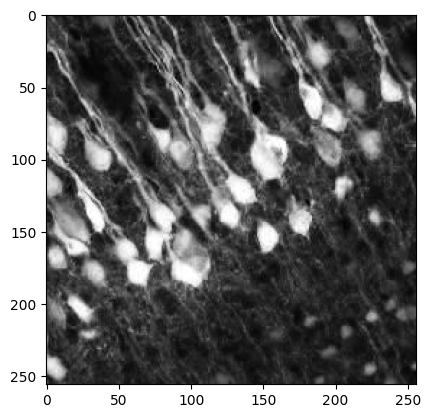

In [2]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [3]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

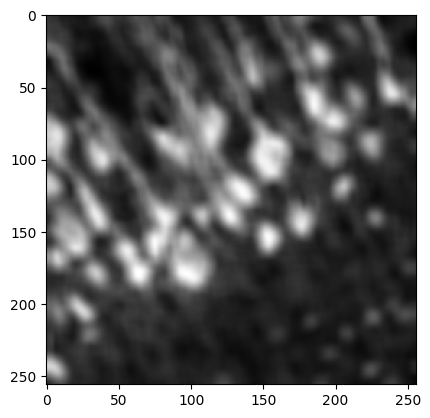

In [ ]:
#apply uniform point spread function (PSF)
#-> blurres the image
psf_img = conv(img, psf, mode="same", boundary="symm")
plt.imshow(psf_img, 'gray')

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

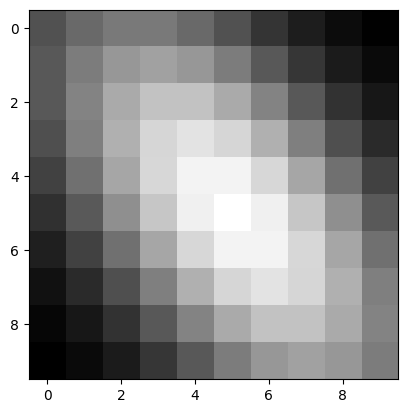

In [11]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')

Apply the second psf to the image:

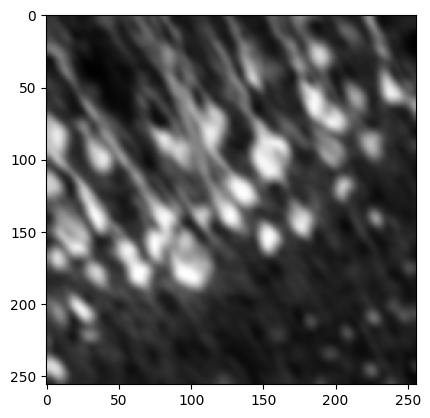

In [ ]:
#mit der Funktion oben die Gaussian psf Maske erstellen (10x10) 
psf_gaussian = create_psf(10)
#die Maske auf das Bild anwenden -> blurred img (nur anders geblurred als vorher)
psf_gauss_img = conv(img, psf_gaussian, mode="same", boundary="symm")
plt.imshow(psf_gauss_img, 'gray')


**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [ ]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full_like(image, 0.5)     #erstellt einen array der voll mit dem Wert 0.5 ist & genausogroß wie image
    psf_flipped = np.flip(psf, axis=(0, 1))

    for i in range(n_iterations):
        conv_1 = conv(img_deconv, psf, mode="same", boundary = "symm")
    
        conv_2 = conv((image/conv_1),psf_flipped,mode="same", boundary = "symm")
        img_deconv *= conv_2  
    
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

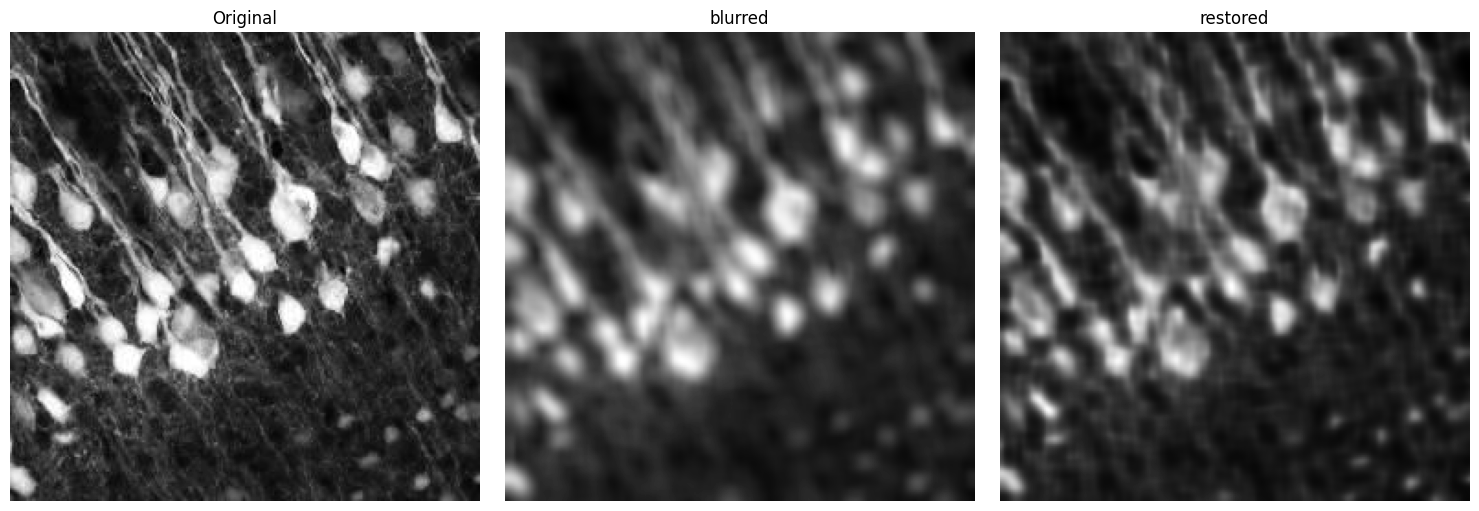

In [42]:
#image restored
psf_img_restored = richardson_lucy_deconvolution(psf_img,psf, 20)

#darstellen
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 Zeile, 3 Spalten

axes[0].imshow(img, cmap='gray')  # Erstes Bild
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(psf_img, cmap='gray')  # Zweites Bild
axes[1].set_title("blurred")
axes[1].axis('off')

axes[2].imshow(psf_img_restored, 'gray')  # Drittes Bild
axes[2].set_title("restored")
axes[2].axis('off')

plt.tight_layout()
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

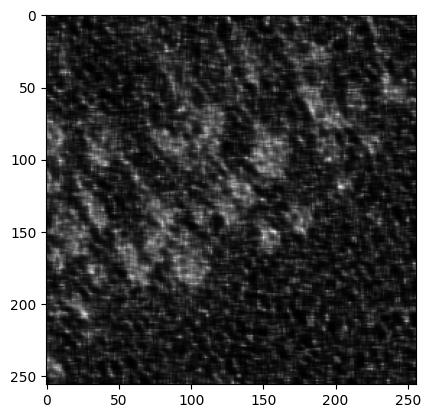

In [ ]:
#mit reduce_factor 5 -> small value -> high noise level
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor
psf_gauss_noise = psf_gauss_img + noise       #noise additive drauf
psf_gauss_noise = psf_gauss_noise.clip(0,1)   #clipping itensities 

#R-L deconvolution
psf_gauss_noise_dec =richardson_lucy_deconvolution(psf_gauss_noise,psf_gaussian, 20)
plt.imshow(psf_gauss_noise_dec, 'gray')

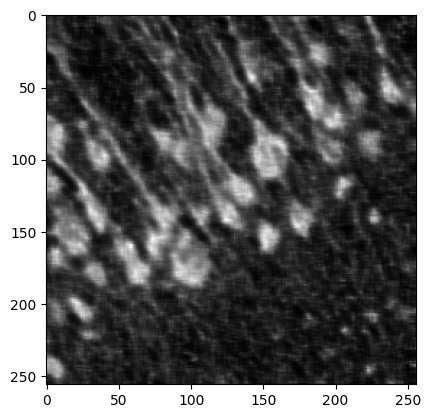

In [52]:
#mit reduce_factor 20 -> high value -> low noise level
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 20
noise = noise / reduce_factor
psf_gauss_noise = psf_gauss_img + noise       #noise additive drauf
psf_gauss_noise = psf_gauss_noise.clip(0,1)   #clipping itensities 

#R-L deconvolution
psf_gauss_noise_dec =richardson_lucy_deconvolution(psf_gauss_noise,psf_gaussian, 20)
plt.imshow(psf_gauss_noise_dec, 'gray')

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

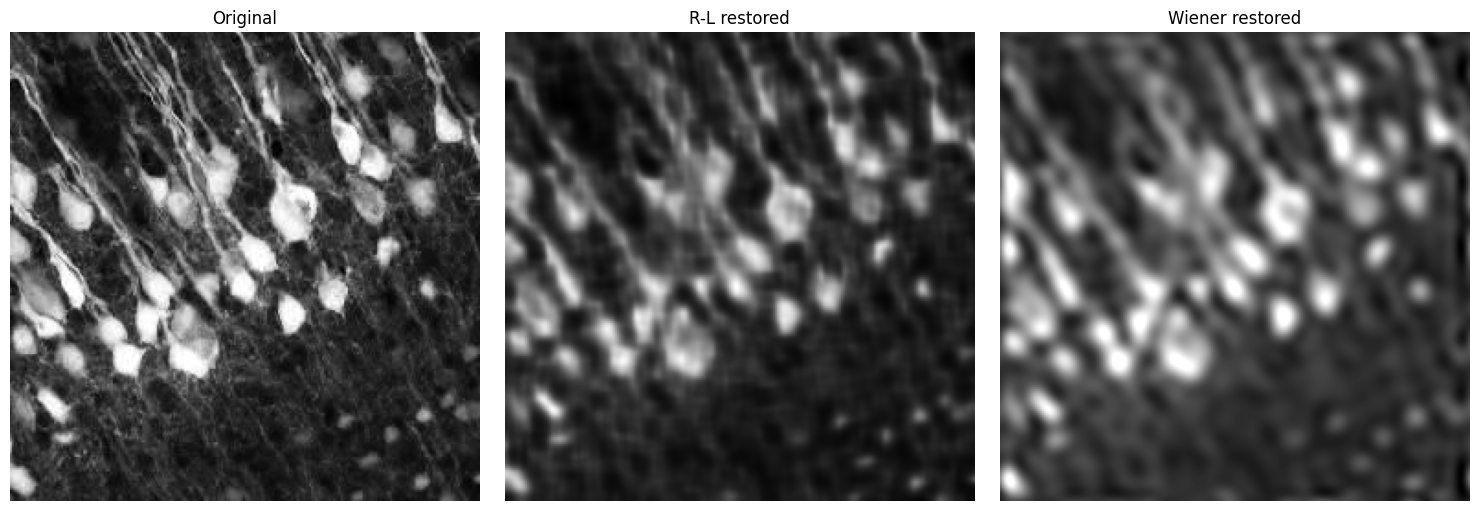

In [58]:
psf_img_wiener = wiener(psf_img, psf, balance=2, clip=True)

#darstellen
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 Zeile, 3 Spalten

axes[0].imshow(img, cmap='gray')  # Erstes Bild
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(psf_img_restored, cmap='gray')  # Zweites Bild
axes[1].set_title("R-L restored")
axes[1].axis('off')

axes[2].imshow(psf_img_wiener, 'gray')  # Drittes Bild
axes[2].set_title("Wiener restored")
axes[2].axis('off')

plt.tight_layout()
plt.show()

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

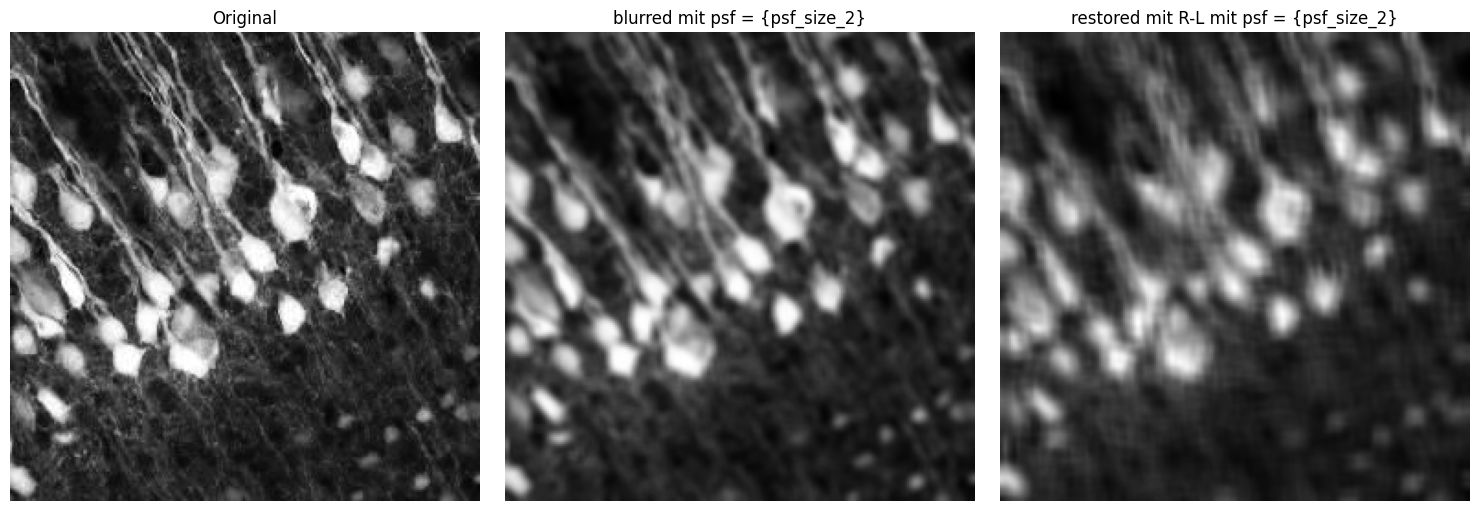

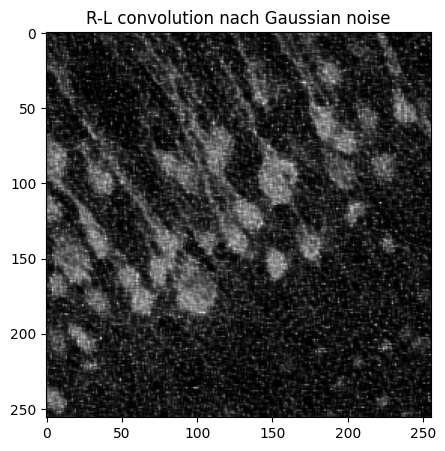

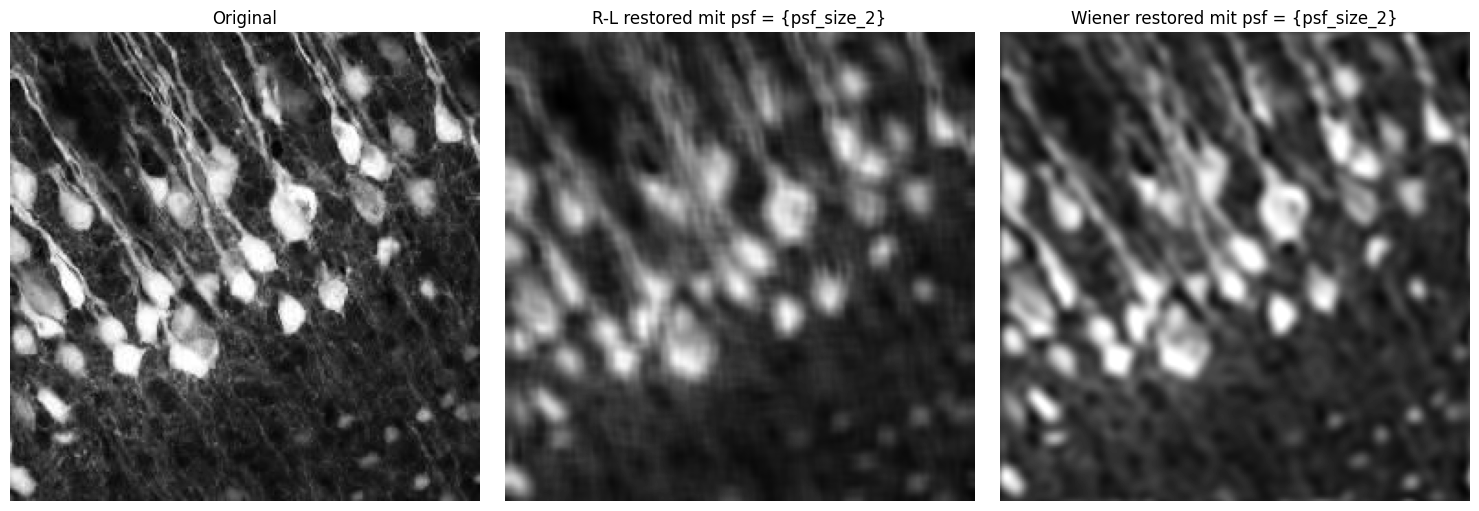

In [60]:
#changing psf size 
psf_size_2 = 5
psf_2 = np.ones((psf_size_2, psf_size_2)) / psf_size_2 ** 2

#blurren mit neuem psf
psf_img_2 = conv(img, psf_2, mode="same", boundary="symm")

#blurren mit neuem Gauss psf
psf_gaussian_2 = create_psf(5)
#die Maske auf das Bild anwenden -> blurred img (nur anders geblurred als vorher)
psf_gauss_img_2 = conv(img, psf_gaussian_2, mode="same", boundary="symm")

#image restored mit R-L
psf_img_restored_2 = richardson_lucy_deconvolution(psf_img,psf_2, 20)

#darstellen
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 Zeile, 3 Spalten

axes[0].imshow(img, cmap='gray')  
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(psf_img_2, cmap='gray') 
axes[1].set_title("blurred mit psf = {psf_size_2}")
axes[1].axis('off')

axes[2].imshow(psf_img_restored_2, 'gray') 
axes[2].set_title("restored mit R-L mit psf = {psf_size_2}")
axes[2].axis('off')

plt.tight_layout()
plt.show()

#(wenig) noise adden + clippen
psf_gauss_noise_2 = psf_gauss_img_2 + noise       #noise additive drauf
psf_gauss_noise_2 = psf_gauss_noise_2.clip(0,1)   #clipping itensities 
#R-L deconvolution
psf_gauss_noise_dec_2 =richardson_lucy_deconvolution(psf_gauss_noise_2,psf_gaussian_2, 20)
plt.figure(figsize=(5,5))
plt.title("R-L convolution nach Gaussian noise")
plt.imshow(psf_gauss_noise_dec_2, 'gray')

#comparison to wiener filter
psf_img_wiener_2 = wiener(psf_img_2, psf_2, balance=2, clip=True)

#darstellen
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 Zeile, 3 Spalten

axes[0].imshow(img, cmap='gray')  
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(psf_img_restored_2, cmap='gray')  
axes[1].set_title("R-L restored mit psf = {psf_size_2}")
axes[1].axis('off')

axes[2].imshow(psf_img_wiener_2, 'gray')  
axes[2].set_title("Wiener restored mit psf = {psf_size_2}")
axes[2].axis('off')

plt.tight_layout()
plt.show()


**[Task 8.]()** Use a wrong PSF to restore the image

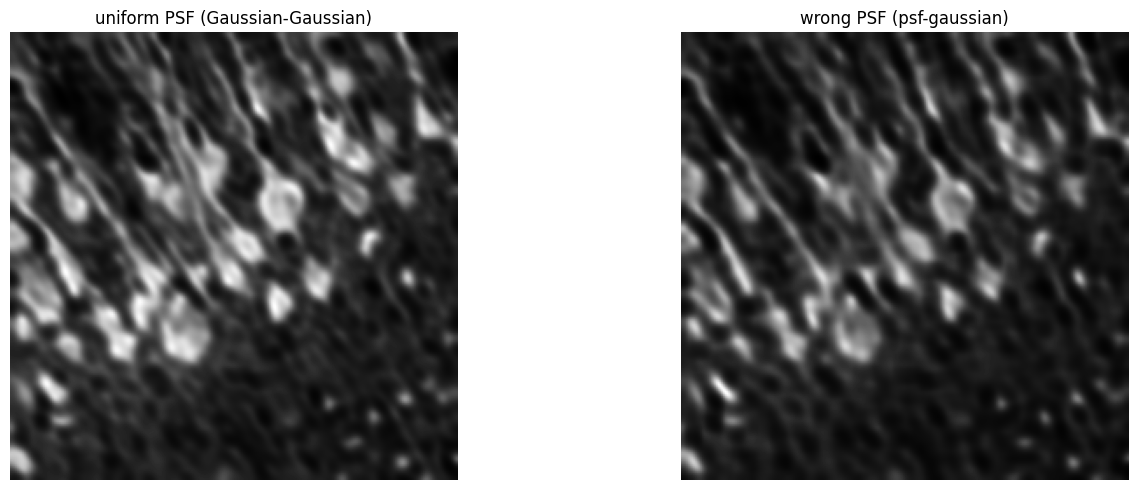

In [62]:
#image restored with wrong psf(psf-g)
psf_img_restored_psf_g = richardson_lucy_deconvolution(psf_gauss_img ,psf, 20)

#image restored with right psf (g-g), hier ohne noise
psf_img_restored_g_g = richardson_lucy_deconvolution(psf_gauss_img ,psf_gaussian, 20)

#darstellen
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 Zeile, 3 Spalten

axes[0].imshow(psf_img_restored_g_g, cmap='gray')  
axes[0].set_title("uniform PSF (Gaussian-Gaussian)")
axes[0].axis('off')

axes[1].imshow(psf_img_restored_psf_g, cmap='gray')  
axes[1].set_title("wrong PSF (psf-gaussian)")
axes[1].axis('off')

plt.tight_layout()
plt.show()